In [2]:
from tools.paddy_funcs import *

Using TensorFlow backend.
/usr/local/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
## DO NOT RUN UNLESS YOU MEAN TO, TAKES A LONG LONG TIME
# COMMENTED OUT TO AVOID ACCIDENTAL RUNNING
# make files for all 100 events with hits padded out to 150/3

# size_of_hit = 150
# for volume_id in [7, 8, 9]:
#     for event_number in range(1000,1100,1):
#         analyse_event(event_number, volume_id, size_of_hit)

In [3]:
# combine all hits and directions from a particular volume
volume_id = 8 
event_number = 1000
event_number_HIGH = 1100
allhits = np.load("hits_info_Vol_" + str(volume_id) + "_event_" + str(event_number) + ".npy")
alldirections = np.load("direction_info_Vol_" + str(volume_id) + "_event_" + str(event_number) + ".npy")
for event_number in range(event_number + 1,event_number_HIGH,1):
    atemp = np.load("hits_info_Vol_" + str(volume_id) + "_event_" + str(event_number) + ".npy")
    btemp = np.load("direction_info_Vol_" + str(volume_id) + "_event_" + str(event_number) + ".npy")
    allhits = np.concatenate((allhits, atemp))
    alldirections = np.concatenate((alldirections, btemp))
print np.shape(allhits), np.shape(alldirections)

(2401845, 150) (2401845, 3)


##  THE NEURAL NET

In [4]:
x = allhits
y = alldirections
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size=0.3, random_state=1974)

In [11]:
# the NN
NNmodel = Sequential()
NNmodel.add(Dense(units=x_train.shape[1], input_dim=x_train.shape[1]))
NNmodel.add(Activation('relu'))
NNmodel.add(Dense(units=x_train.shape[1]))
NNmodel.add(Activation('relu'))
NNmodel.add(Dense(units=int(0.25 * x_train.shape[1])))
NNmodel.add(Activation('relu'))
NNmodel.add(Dense(units=y_train.shape[1]))
#NNmodel.add(Activation('tanh'))          
NNmodel.compile(optimizer='adam', loss='cosine_proximity', metrics=['mse', 'mae', 'mape', 'accuracy'])

In [15]:
#train it!
NNmodel_hist=NNmodel.fit(x_train, y_train, epochs=500, batch_size=1000, verbose=1)

Epoch 1/500
1681291/1681291 [==============================] - 28s - loss: -0.2334 - mean_squared_error: 44.1467 - mean_absolute_error: 3.0221 - mean_absolute_percentage_error: 2375.9129 - acc: 0.7714    
Epoch 2/500
1681291/1681291 [==============================] - 24s - loss: -0.2348 - mean_squared_error: 45.9651 - mean_absolute_error: 3.0767 - mean_absolute_percentage_error: 2345.3373 - acc: 0.7743    
Epoch 3/500
1681291/1681291 [==============================] - 24s - loss: -0.2350 - mean_squared_error: 46.2132 - mean_absolute_error: 3.0968 - mean_absolute_percentage_error: 2239.1232 - acc: 0.7748    
Epoch 4/500
1681291/1681291 [==============================] - 24s - loss: -0.2351 - mean_squared_error: 48.8006 - mean_absolute_error: 3.1815 - mean_absolute_percentage_error: 2366.4852 - acc: 0.7746    
Epoch 5/500
1681291/1681291 [==============================] - 23s - loss: -0.2352 - mean_squared_error: 51.2986 - mean_absolute_error: 3.2617 - mean_absolute_percentage_error: 235

1681291/1681291 [==============================] - 23s - loss: -0.2357 - mean_squared_error: 132.1949 - mean_absolute_error: 5.3322 - mean_absolute_percentage_error: 3874.0086 - acc: 0.7761    
Epoch 41/500
1681291/1681291 [==============================] - 22s - loss: -0.2358 - mean_squared_error: 134.7150 - mean_absolute_error: 5.3954 - mean_absolute_percentage_error: 3945.5418 - acc: 0.7762    
Epoch 42/500
1681291/1681291 [==============================] - 22s - loss: -0.2358 - mean_squared_error: 139.3680 - mean_absolute_error: 5.4825 - mean_absolute_percentage_error: 4178.7741 - acc: 0.7764    
Epoch 43/500
1681291/1681291 [==============================] - 23s - loss: -0.2358 - mean_squared_error: 144.4718 - mean_absolute_error: 5.5669 - mean_absolute_percentage_error: 4070.4303 - acc: 0.7762    
Epoch 44/500
1681291/1681291 [==============================] - 23s - loss: -0.2358 - mean_squared_error: 146.1238 - mean_absolute_error: 5.6107 - mean_absolute_percentage_error: 3969.2

1681291/1681291 [==============================] - ETA: 0s - loss: -0.2362 - mean_squared_error: 260.0625 - mean_absolute_error: 7.5580 - mean_absolute_percentage_error: 5391.1468 - acc: 0.777 - 23s - loss: -0.2362 - mean_squared_error: 260.0648 - mean_absolute_error: 7.5582 - mean_absolute_percentage_error: 5388.9856 - acc: 0.7771    
Epoch 79/500
1681291/1681291 [==============================] - 23s - loss: -0.2363 - mean_squared_error: 262.5563 - mean_absolute_error: 7.5980 - mean_absolute_percentage_error: 5486.1468 - acc: 0.7774    
Epoch 80/500
1681291/1681291 [==============================] - 23s - loss: -0.2362 - mean_squared_error: 269.1091 - mean_absolute_error: 7.6879 - mean_absolute_percentage_error: 5615.0301 - acc: 0.7772    
Epoch 81/500
1681291/1681291 [==============================] - 22s - loss: -0.2363 - mean_squared_error: 273.7171 - mean_absolute_error: 7.7475 - mean_absolute_percentage_error: 5584.5807 - acc: 0.7772    
Epoch 82/500
1681291/1681291 [===========

1681291/1681291 [==============================] - 21s - loss: -0.2366 - mean_squared_error: 442.9836 - mean_absolute_error: 9.9311 - mean_absolute_percentage_error: 7421.1843 - acc: 0.7779    
Epoch 117/500
1681291/1681291 [==============================] - 26s - loss: -0.2365 - mean_squared_error: 456.5450 - mean_absolute_error: 10.0688 - mean_absolute_percentage_error: 7298.7767 - acc: 0.7779    
Epoch 118/500
1681291/1681291 [==============================] - 28s - loss: -0.2366 - mean_squared_error: 463.9425 - mean_absolute_error: 10.1308 - mean_absolute_percentage_error: 7400.0943 - acc: 0.7780    
Epoch 119/500
1681291/1681291 [==============================] - 22s - loss: -0.2367 - mean_squared_error: 473.1246 - mean_absolute_error: 10.2336 - mean_absolute_percentage_error: 7376.8840 - acc: 0.7781    
Epoch 120/500
1681291/1681291 [==============================] - 24s - loss: -0.2366 - mean_squared_error: 475.1719 - mean_absolute_error: 10.2488 - mean_absolute_percentage_error

KeyboardInterrupt: 

In [7]:
NNmodel_hist=NNmodel.fit(x_train, y_train, epochs=600, batch_size=10000, verbose=1)

Epoch 1/600
1681291/1681291 [==============================] - 18s - loss: -0.2366 - acc: 0.7780    
Epoch 2/600
1681291/1681291 [==============================] - 18s - loss: -0.2366 - acc: 0.7778    
Epoch 3/600
1681291/1681291 [==============================] - 19s - loss: -0.2366 - acc: 0.7775    
Epoch 4/600
1681291/1681291 [==============================] - 18s - loss: -0.2367 - acc: 0.7781    
Epoch 5/600
1681291/1681291 [==============================] - 18s - loss: -0.2366 - acc: 0.7776    
Epoch 6/600
1681291/1681291 [==============================] - 18s - loss: -0.2366 - acc: 0.7779    
Epoch 7/600
1681291/1681291 [==============================] - 18s - loss: -0.2366 - acc: 0.7779    
Epoch 8/600
1681291/1681291 [==============================] - 18s - loss: -0.2366 - acc: 0.7776    
Epoch 9/600
1681291/1681291 [==============================] - 18s - loss: -0.2367 - acc: 0.7779    
Epoch 10/600
1681291/1681291 [==============================] - 18s - loss: -0.2366 - acc: 

1681291/1681291 [==============================] - 18s - loss: -0.2374 - acc: 0.7794    
Epoch 161/600
1681291/1681291 [==============================] - 18s - loss: -0.2375 - acc: 0.7795    
Epoch 162/600
1681291/1681291 [==============================] - 18s - loss: -0.2374 - acc: 0.7795    
Epoch 163/600
1681291/1681291 [==============================] - 18s - loss: -0.2373 - acc: 0.7793    
Epoch 164/600
1681291/1681291 [==============================] - 18s - loss: -0.2375 - acc: 0.7798    
Epoch 165/600
1681291/1681291 [==============================] - 18s - loss: -0.2374 - acc: 0.7797    
Epoch 166/600
1681291/1681291 [==============================] - 18s - loss: -0.2374 - acc: 0.7796    
Epoch 167/600
1681291/1681291 [==============================] - 18s - loss: -0.2374 - acc: 0.7795    
Epoch 168/600
1681291/1681291 [==============================] - 18s - loss: -0.2374 - acc: 0.7796    
Epoch 169/600
1681291/1681291 [==============================] - 18s - loss: -0.2375 - 

1681291/1681291 [==============================] - 18s - loss: -0.2380 - acc: 0.7810    
Epoch 319/600
1681291/1681291 [==============================] - 18s - loss: -0.2381 - acc: 0.7809    
Epoch 320/600
1681291/1681291 [==============================] - 18s - loss: -0.2380 - acc: 0.7810    
Epoch 321/600
1681291/1681291 [==============================] - 21s - loss: -0.2381 - acc: 0.7810    
Epoch 322/600
1681291/1681291 [==============================] - 19s - loss: -0.2381 - acc: 0.7810    
Epoch 323/600
1681291/1681291 [==============================] - 18s - loss: -0.2381 - acc: 0.7811    
Epoch 324/600
1681291/1681291 [==============================] - 18s - loss: -0.2381 - acc: 0.7810    
Epoch 325/600
1681291/1681291 [==============================] - 18s - loss: -0.2380 - acc: 0.7807    
Epoch 326/600
1681291/1681291 [==============================] - 18s - loss: -0.2381 - acc: 0.7810    
Epoch 327/600
1681291/1681291 [==============================] - 18s - loss: -0.2380 - 

1681291/1681291 [==============================] - 18s - loss: -0.2385 - acc: 0.7820    
Epoch 477/600
1681291/1681291 [==============================] - 18s - loss: -0.2385 - acc: 0.7821    
Epoch 478/600
1681291/1681291 [==============================] - 18s - loss: -0.2384 - acc: 0.7818    
Epoch 479/600
1681291/1681291 [==============================] - 18s - loss: -0.2385 - acc: 0.7819    
Epoch 480/600
1681291/1681291 [==============================] - 18s - loss: -0.2385 - acc: 0.7820    
Epoch 481/600
1681291/1681291 [==============================] - 18s - loss: -0.2386 - acc: 0.7822    
Epoch 482/600
1681291/1681291 [==============================] - 18s - loss: -0.2385 - acc: 0.7821    
Epoch 483/600
1681291/1681291 [==============================] - 18s - loss: -0.2386 - acc: 0.7823    
Epoch 484/600
1681291/1681291 [==============================] - 18s - loss: -0.2386 - acc: 0.7822    
Epoch 485/600
1681291/1681291 [==============================] - 18s - loss: -0.2386 - 

In [16]:
NNmodel.evaluate(x_test, y_test)

720554/720554 [==============================] - 36s    


[-0.2323751408154772,
 528.0072279696678,
 10.816268878423736,
 6269.784680206377,
 0.7753922676161409]

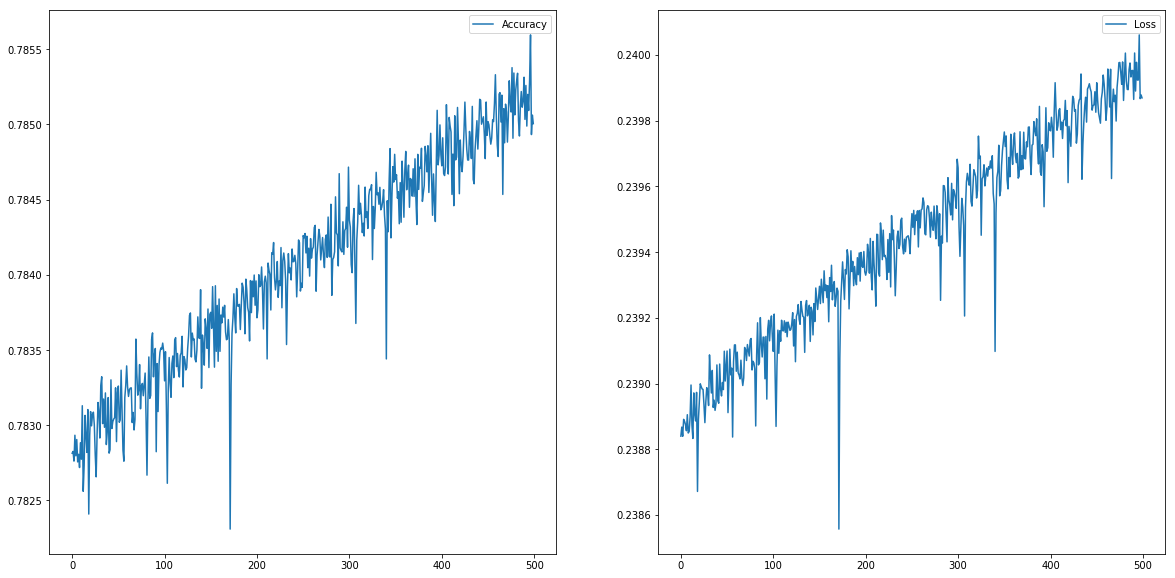

In [22]:
# accuracy etc
f = plt.figure(figsize=(20,10))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax.set_yscale('linear')
ax.set_xscale('linear')
ax.plot(NNmodel_hist.history['acc'], label = 'Accuracy')
ax.legend()


ax2.set_yscale('linear')
ax.set_xscale('linear')
ax2.plot(np.abs(NNmodel_hist.history['loss']), label = 'Loss')
ax2.legend()

In [17]:
#save it
NNmodel.save('Vol8_big_trainNN_3.h5')

## Some plots

In [12]:
NNmodel.load_weights('Vol8_big_trainNN_2.h5')

0.01411907553648965


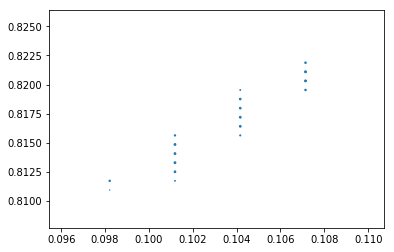

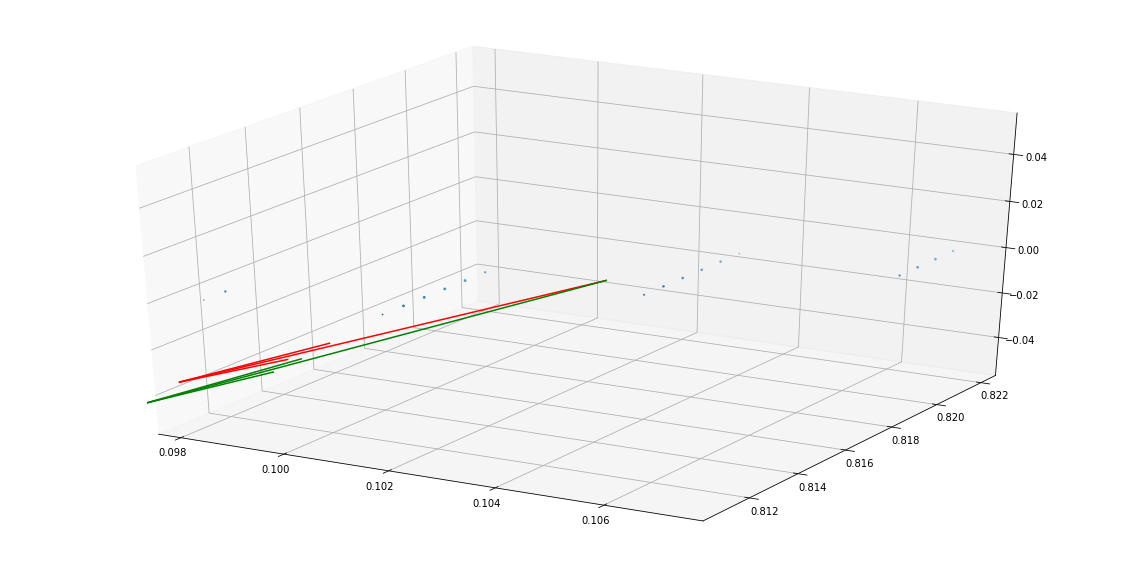

In [16]:
display_hit(1000, 8, 1234, NNmodel)

In [12]:
hits, cells, particles, truth = load_event('/Users/pjfox/Dropbox/NN/TrackML/train_100_events/event00000' + str(1000))
hit = makelistofhits(cells, hits, 1, 150)
predict_direction(hit, NNmodel)

array([0.00439764, 0.16950783, 0.98551905], dtype=float32)